In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Import linear regression from teh SciPy stats module.
from scipy.stats import linregress

# Starting URL for Weather Map API Call. 
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations. 
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list. 
coordinates = list(lat_lngs)

In [4]:
# Import Citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities. 
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If teh city is unique, then we will add it to the cities list. 
    if city not in cities:
        cities.append(city)
#Print the city count to confirm sufficient count. 
len(cities)

611

In [6]:
# Create an empty list to hold the weather data. 
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list. 
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API Request for each of the cities. 
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Covert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        # Append the city information into city_data list. 
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
          
# If an error is experienced, skip the city. 
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | solton
Processing Record 2 of Set 1 | oranjestad
Processing Record 3 of Set 1 | tire
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | cheuskiny
City not found. Skipping...
Processing Record 7 of Set 1 | sinkat
City not found. Skipping...
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | klaksvik
Processing Record 10 of Set 1 | vanimo
Processing Record 11 of Set 1 | castro
Processing Record 12 of Set 1 | ivanovka
Processing Record 13 of Set 1 | satitoa
City not found. Skipping...
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | hundorp
Processing Record 16 of Set 1 | jamestown
Processing Record 17 of Set 1 | nuuk
Processing Record 18 of Set 1 | moree
Processing Record 19 of Set 1 | rodrigues alves
Processing Record 20 of Set 1 | lovington
Processing Record 21 of Set 1 | cherskiy
Proces

Processing Record 38 of Set 4 | georgetown
Processing Record 39 of Set 4 | margate
Processing Record 40 of Set 4 | lhuntshi
City not found. Skipping...
Processing Record 41 of Set 4 | dawlatabad
Processing Record 42 of Set 4 | kabanjahe
Processing Record 43 of Set 4 | verkhnyaya inta
Processing Record 44 of Set 4 | qaqortoq
Processing Record 45 of Set 4 | araouane
Processing Record 46 of Set 4 | aranos
Processing Record 47 of Set 4 | ancud
Processing Record 48 of Set 4 | camacha
Processing Record 49 of Set 4 | kaitangata
Processing Record 50 of Set 4 | beloha
Processing Record 1 of Set 5 | atambua
Processing Record 2 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 3 of Set 5 | bhan
Processing Record 4 of Set 5 | bluff
Processing Record 5 of Set 5 | mishelevka
Processing Record 6 of Set 5 | golden gate
Processing Record 7 of Set 5 | mahibadhoo
Processing Record 8 of Set 5 | auras
Processing Record 9 of Set 5 | zhigansk
Processing Record 10 of Set 5 | alghero
Processing

Processing Record 30 of Set 8 | takoradi
Processing Record 31 of Set 8 | san andres
Processing Record 32 of Set 8 | yakeshi
Processing Record 33 of Set 8 | krasnoselkup
Processing Record 34 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 35 of Set 8 | honningsvag
Processing Record 36 of Set 8 | ust-ilimsk
Processing Record 37 of Set 8 | yelniki
Processing Record 38 of Set 8 | shahabad
Processing Record 39 of Set 8 | fort-shevchenko
Processing Record 40 of Set 8 | hammerfest
Processing Record 41 of Set 8 | seydi
Processing Record 42 of Set 8 | methoni
Processing Record 43 of Set 8 | saint-augustin
Processing Record 44 of Set 8 | altar
Processing Record 45 of Set 8 | taoudenni
Processing Record 46 of Set 8 | coruripe
Processing Record 47 of Set 8 | solovetskiy
City not found. Skipping...
Processing Record 48 of Set 8 | maykain
City not found. Skipping...
Processing Record 49 of Set 8 | mindelo
Processing Record 50 of Set 8 | saint-pierre
Processing Record 1 of Set 9 | y

Processing Record 13 of Set 12 | de aar
Processing Record 14 of Set 12 | rincon
Processing Record 15 of Set 12 | esperance
Processing Record 16 of Set 12 | caxito
Processing Record 17 of Set 12 | marovoay
Processing Record 18 of Set 12 | maragogi
Processing Record 19 of Set 12 | marsh harbour
Processing Record 20 of Set 12 | kem
Processing Record 21 of Set 12 | coron
Processing Record 22 of Set 12 | bubaque
Processing Record 23 of Set 12 | zhiryatino
Processing Record 24 of Set 12 | jaguey grande
Processing Record 25 of Set 12 | alta floresta
Processing Record 26 of Set 12 | deer lake
Processing Record 27 of Set 12 | rawson
Processing Record 28 of Set 12 | poyarkovo
Processing Record 29 of Set 12 | brazzaville
Processing Record 30 of Set 12 | yemtsa
Processing Record 31 of Set 12 | bansi
Processing Record 32 of Set 12 | forio
Processing Record 33 of Set 12 | leh
Processing Record 34 of Set 12 | ikovka
Processing Record 35 of Set 12 | osorno
Processing Record 36 of Set 12 | ayagoz
Proce

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Solton,52.84,86.48,33.12,92,100,7.65,RU,2020-11-06 00:41:00
1,Oranjestad,12.52,-70.03,82.40,78,20,13.87,AW,2020-11-06 00:41:01
2,Tire,38.09,27.74,60.80,67,40,17.22,TR,2020-11-06 00:41:01
3,Avarua,-21.21,-159.78,77.00,78,27,9.17,CK,2020-11-06 00:41:01
4,Arraial Do Cabo,-22.97,-42.03,68.94,80,100,13.98,BR,2020-11-06 00:41:01
5,Puerto Ayora,-0.74,-90.35,70.00,77,86,5.99,EC,2020-11-06 00:41:01
6,Klaksvik,62.23,-6.59,50.00,100,100,14.99,FO,2020-11-06 00:41:01
7,Vanimo,-2.67,141.30,86.76,63,100,4.05,PG,2020-11-06 00:41:02
8,Castro,-24.79,-50.01,54.57,64,0,5.39,BR,2020-11-06 00:41:02
9,Ivanovka,42.89,75.08,26.60,86,23,2.24,KG,2020-11-06 00:41:02


In [8]:
# Arrange the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Solton,RU,2020-11-06 00:41:00,52.84,86.48,33.12,92,100,7.65
1,Oranjestad,AW,2020-11-06 00:41:01,12.52,-70.03,82.40,78,20,13.87
2,Tire,TR,2020-11-06 00:41:01,38.09,27.74,60.80,67,40,17.22
3,Avarua,CK,2020-11-06 00:41:01,-21.21,-159.78,77.00,78,27,9.17
4,Arraial Do Cabo,BR,2020-11-06 00:41:01,-22.97,-42.03,68.94,80,100,13.98
5,Puerto Ayora,EC,2020-11-06 00:41:01,-0.74,-90.35,70.00,77,86,5.99
6,Klaksvik,FO,2020-11-06 00:41:01,62.23,-6.59,50.00,100,100,14.99
7,Vanimo,PG,2020-11-06 00:41:02,-2.67,141.30,86.76,63,100,4.05
8,Castro,BR,2020-11-06 00:41:02,-24.79,-50.01,54.57,64,0,5.39
9,Ivanovka,KG,2020-11-06 00:41:02,42.89,75.08,26.60,86,23,2.24


In [9]:
# Create teh output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time

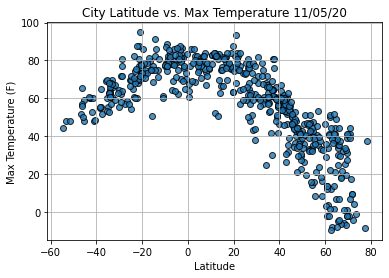

In [12]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig1.png")

# Show Plot.
plt.show()

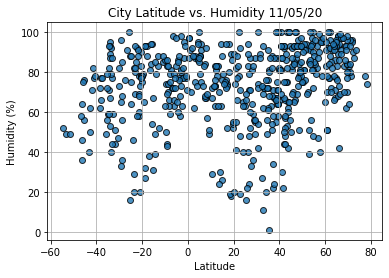

In [13]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig2.png")

# Show Plot.
plt.show()

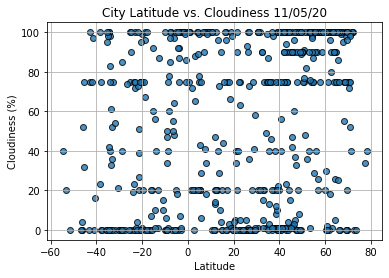

In [14]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig3.png")

# Show Plot.
plt.show()

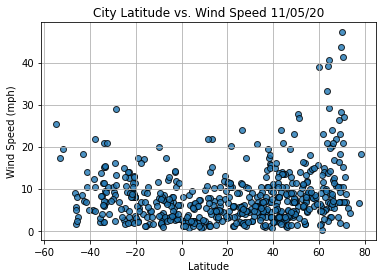

In [15]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure. 
plt.savefig("weather_data/Fig4.png")

# Show Plot.
plt.show()

In [62]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemishere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values,y_values)
    print(f"{r_value}")
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get teh equation of the line. 
    line_eq = "y = " + str(round(slope,2)) + "x" + "+" + str(round(intercept,2))
    # Create a scatter plot and plot the regression line. 
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equeation. 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [46]:
index13 = city_data_df.loc[13]
index13

City                         Nuuk
Country                        GL
Date          2020-11-06 00:41:03
Lat                         64.18
Lng                        -51.72
Max Temp                     21.2
Humidity                       67
Cloudiness                     26
Wind Speed                   6.93
Name: 13, dtype: object

In [47]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

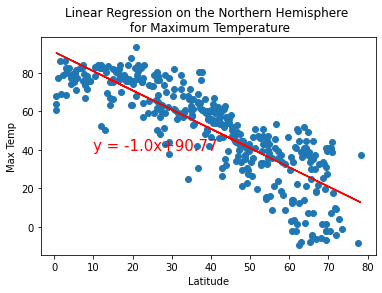

In [48]:
# Linear regressionon the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40))

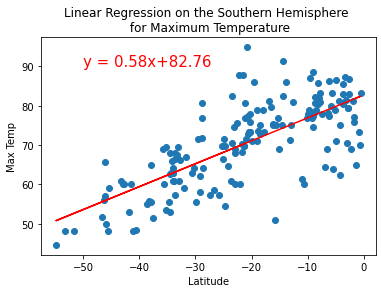

In [49]:
# Linear regressionon the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

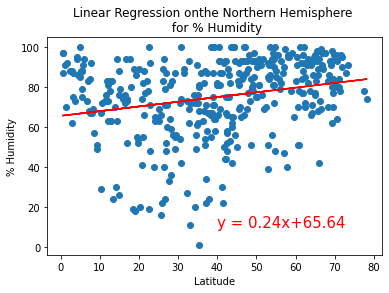

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression onthe Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

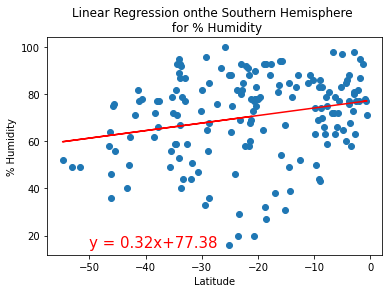

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression onthe Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

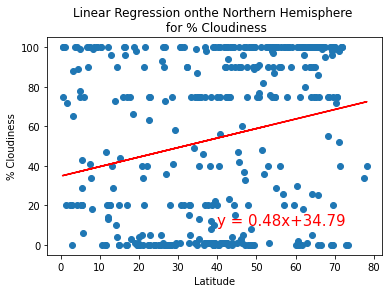

In [53]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression onthe Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,10))

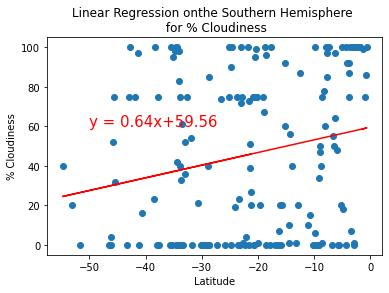

In [55]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values, 'Linear Regression onthe Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

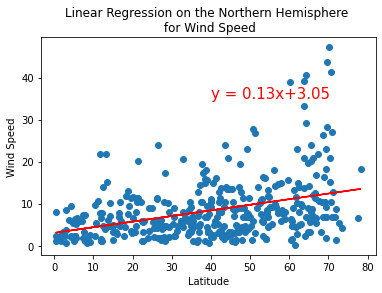

In [57]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

-0.28291570978958336


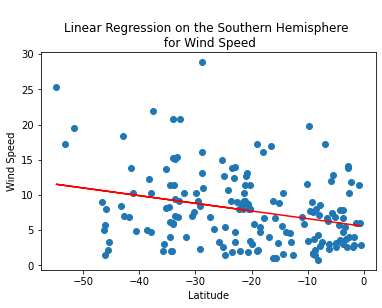

In [63]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))